In [ ]:
#https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [28]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
from datetime import datetime
import os

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')

In [8]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [11]:
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)
print ("y_train[0:10]:", y_train[0:10])
print ("y_test[0:10]:", y_test[0:10])
print ("X_train[0, 0, :]:\n", X_train[0, 0, :])
print (np.amax(X_train))
print (np.min(X_train))
print (np.unique(X_train))
#NB: MNIST dataset is arrays of integer values in range 0 to 255.

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)
y_train[0:10]: [5 0 4 1 9 2 1 3 1 4]
y_test[0:10]: [7 2 1 0 4 1 4 9 5 9]
X_train[0, 0, :]:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
255
0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 1

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


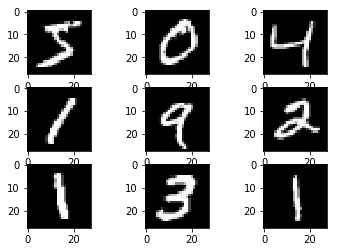

In [1]:
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [13]:
# reshape to be [samples][pixels][width][height]
#reshape from 6000,28,28 to 6000,1,28,28
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print ("X_train:", X_train.shape)
print ("X_test:", X_test.shape)


X_train: (60000, 1, 28, 28)
X_test: (10000, 1, 28, 28)


In [14]:
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [17]:
# define data preparation
startTime= datetime.now()
print ("startTime:", startTime)
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


# fit parameters from data
startTime= datetime.now()
print ("startTime:", startTime)
datagen.fit(X_train)
timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-05 22:45:42.103219
Time elapsed (hh:mm:ss.ms) 0:00:00.000586
startTime: 2017-12-05 22:45:42.103948
Time elapsed (hh:mm:ss.ms) 0:00:00.280026


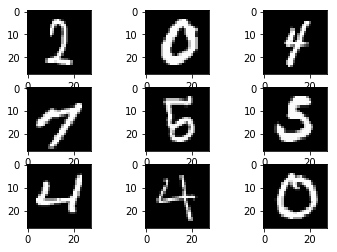

In [20]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
#NB: this should show more visible lightening and darkening of images.

In [22]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)

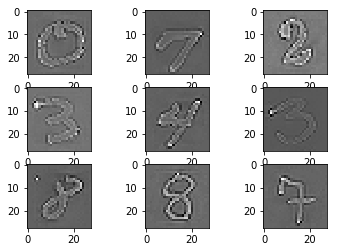

In [23]:
#Less redundancy in the image is intended to better highlight the structures 
#and features in the image to the learning algorithm.

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

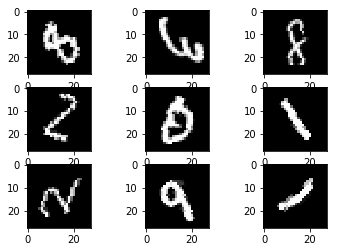

In [24]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

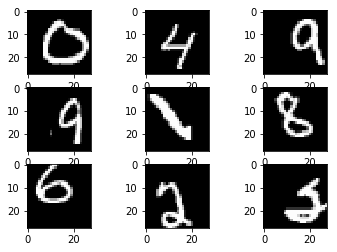

In [25]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

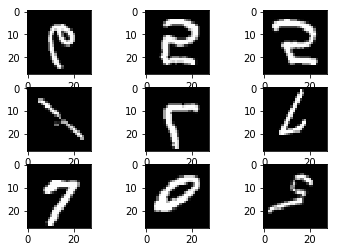

In [26]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

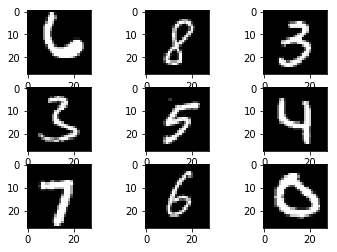

In [29]:
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

/home/ubuntu/fastai/fastai_bmt_reworking/nonFastAITuts/MLMastery


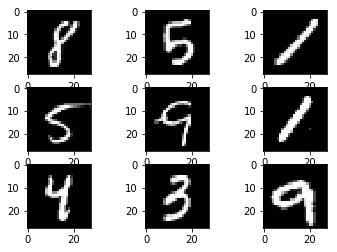

In [34]:
print (os.getcwd())
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
if not os.path.isdir("images"):
    print ("creating directory.")
    os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break